In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('x_train_2.csv')
df=df.set_index(['광역시도','시군구별'])
df

농업 임업 및 어업 산업성장지수  광업 산업성장지수  제조업 산업성장지수  전기가스증기 및 공기조절 공급업 산업성장지수  \
광역시도 시군구별                                                                       
충청북도 합계                 6.14       6.13        6.12                      6.06   
     청주시                5.98       6.03        6.14                      6.07   
     충주시                6.03       6.17        6.15                      6.17   
     제천시                6.56       6.07        6.13                      6.02   
     보은군                6.11       5.78        6.07                      6.22   
...                      ...        ...         ...                       ...   
경상남도 하동군                5.94       6.10        6.10                      6.06   
     산청군                5.96       5.89        6.12                      6.03   
     함양군                6.01       6.10        6.09                      5.98   
     거창군                5.91       6.02        6.00                      6.18   
     합천군                6.12       5.99        6.07                      6.40   

           수도, 하수 및 폐기물 처리, 원료 재생업 산업성장지수  건설업 산업성장지수  도매 및 소매업 산업성장지수  \
광역시도 시군구별                                                                
충청북도 합계                              6.00        6.10             6.06   
     청주시                             6.01        6.11             6.05   
     충주시                             6.02        6.11             6.06   
     제천시                             5.97        6.07             6.03   
     보은군                             5.99        5.94             6.00   
...                                   ...         ...              ...   
경상남도 하동군                             6.14        6.09             6.03   
     산청군                             6.01        5.94             6.08   
     함양군                             6.13        6.01             6.01   
     거창군                             6.08        6.06             6.01   
     합천군                             6.16        6.00             6.04   

           운수 및 창고업 산업성장지수  숙박 및 음식점업 산업성장지수  정보통신업 산업성장지수  금융 및 보험업 산업성장지수  \
광역시도 시군구별                                                                     
충청북도 합계               6.14              6.14          6.04             6.04   
     청주시              6.12              6.14          6.03             5.99   
     충주시              6.17              6.12          6.00             6.26   
     제천시              6.10              6.11          5.94             5.98   
     보은군              6.30              6.10          5.95             6.10   
...                    ...               ...           ...              ...   
경상남도 하동군              6.40              6.08          5.94             5.95   
     산청군              6.14              6.10          6.04             6.06   
     함양군              6.15              5.98          5.97             5.97   
     거창군              6.04              6.06          5.95             6.02   
     합천군              6.07              6.10          5.93             6.03   

           부동산업 산업성장지수  전문, 과학 및 기술서비스업 산업성장지수  사업시설관리 및 사업지원 및 임대서비스업 산업성장지수  \
광역시도 시군구별                                                                       
충청북도 합계           6.07                    6.29                           6.22   
     청주시          6.08                    6.29                           6.23   
     충주시          6.05                    6.34                           6.08   
     제천시          6.02                    6.12                           6.29   
     보은군          6.07                    6.31                           6.42   
...                ...                     ...                            ...   
경상남도 하동군          6.04                    6.18                           6.07   
     산청군          5.98                    6.01                           5.83   
     함양군          5.89                    6.39                           7.20   
     거창군          5.91                    6.16                           7.

In [3]:
df_2=pd.read_excel('산업특성화지수.xlsx')
df_2=df_2.set_index(['광역시도','시군구별'])
df_2

산업특성화지수
광역시도 시군구별         
충청북도 합계       6.19
     청주시      6.14
     충주시      6.21
     제천시      6.33
     보은군      6.31
...            ...
경상남도 하동군      6.17
     산청군      6.17
     함양군      6.45
     거창군      6.47
     합천군      6.55

[109 rows x 1 columns]

In [4]:
i=df_2['산업특성화지수']
df.insert(20, '산업특성화지수',i)
df

농업 임업 및 어업 산업성장지수  광업 산업성장지수  제조업 산업성장지수  전기가스증기 및 공기조절 공급업 산업성장지수  \
광역시도 시군구별                                                                       
충청북도 합계                 6.14       6.13        6.12                      6.06   
     청주시                5.98       6.03        6.14                      6.07   
     충주시                6.03       6.17        6.15                      6.17   
     제천시                6.56       6.07        6.13                      6.02   
     보은군                6.11       5.78        6.07                      6.22   
...                      ...        ...         ...                       ...   
경상남도 하동군                5.94       6.10        6.10                      6.06   
     산청군                5.96       5.89        6.12                      6.03   
     함양군                6.01       6.10        6.09                      5.98   
     거창군                5.91       6.02        6.00                      6.18   
     합천군                6.12       5.99        6.07                      6.40   

           수도, 하수 및 폐기물 처리, 원료 재생업 산업성장지수  건설업 산업성장지수  도매 및 소매업 산업성장지수  \
광역시도 시군구별                                                                
충청북도 합계                              6.00        6.10             6.06   
     청주시                             6.01        6.11             6.05   
     충주시                             6.02        6.11             6.06   
     제천시                             5.97        6.07             6.03   
     보은군                             5.99        5.94             6.00   
...                                   ...         ...              ...   
경상남도 하동군                             6.14        6.09             6.03   
     산청군                             6.01        5.94             6.08   
     함양군                             6.13        6.01             6.01   
     거창군                             6.08        6.06             6.01   
     합천군                             6.16        6.00             6.04   

           운수 및 창고업 산업성장지수  숙박 및 음식점업 산업성장지수  정보통신업 산업성장지수  ...  부동산업 산업성장지수  \
광역시도 시군구별                                                   ...                
충청북도 합계               6.14              6.14          6.04  ...         6.07   
     청주시              6.12              6.14          6.03  ...         6.08   
     충주시              6.17              6.12          6.00  ...         6.05   
     제천시              6.10              6.11          5.94  ...         6.02   
     보은군              6.30              6.10          5.95  ...         6.07   
...                    ...               ...           ...  ...          ...   
경상남도 하동군              6.40              6.08          5.94  ...         6.04   
     산청군              6.14              6.10          6.04  ...         5.98   
     함양군              6.15              5.98          5.97  ...         5.89   
     거창군              6.04              6.06          5.95  ...         5.91   
     합천군              6.07              6.10          5.93  ...         5.92   

           전문, 과학 및 기술서비스업 산업성장지수  사업시설관리 및 사업지원 및 임대서비스업 산업성장지수  \
광역시도 시군구별                                                          
충청북도 합계                      6.29                           6.22   
     청주시                     6.29                           6.23   
     충주시                     6.34                           6.08   
     제천시                     6.12                           6.29   
     보은군                     6.31                           6.42   
...                           ...                            ...   
경상남도 하동군                     6.18                           6.07   
     산청군                     6.01                           5.83   
     함양군                     6.39                           7.20   
     거창군                     6.16                           7.32   
     합천군                     6.00                           6.20   

           공공행정, 국방 및 사회보장행정 산업성장지수  교육서비스업 산업성장지수  보건업 및 사회복지서비스업 산

In [5]:
x=df.columns
x

Index(['농업 임업 및 어업 산업성장지수', '광업 산업성장지수', '제조업 산업성장지수',
       '전기가스증기 및 공기조절 공급업 산업성장지수', '수도, 하수 및 폐기물 처리, 원료 재생업 산업성장지수',
       '건설업 산업성장지수', '도매 및 소매업 산업성장지수', '운수 및 창고업 산업성장지수', '숙박 및 음식점업 산업성장지수',
       '정보통신업 산업성장지수', '금융 및 보험업 산업성장지수', '부동산업 산업성장지수',
       '전문, 과학 및 기술서비스업 산업성장지수', '사업시설관리 및 사업지원 및 임대서비스업 산업성장지수',
       '공공행정, 국방 및 사회보장행정 산업성장지수', '교육서비스업 산업성장지수', '보건업 및 사회복지서비스업 산업성장지수',
       '예술, 스포츠 및 여가관련서비스업 산업성장지수', '협회 및 단체, 수리 기타 개인서비스업 산업성장지수', '산업균형지수',
       '산업특성화지수'],
      dtype='object')

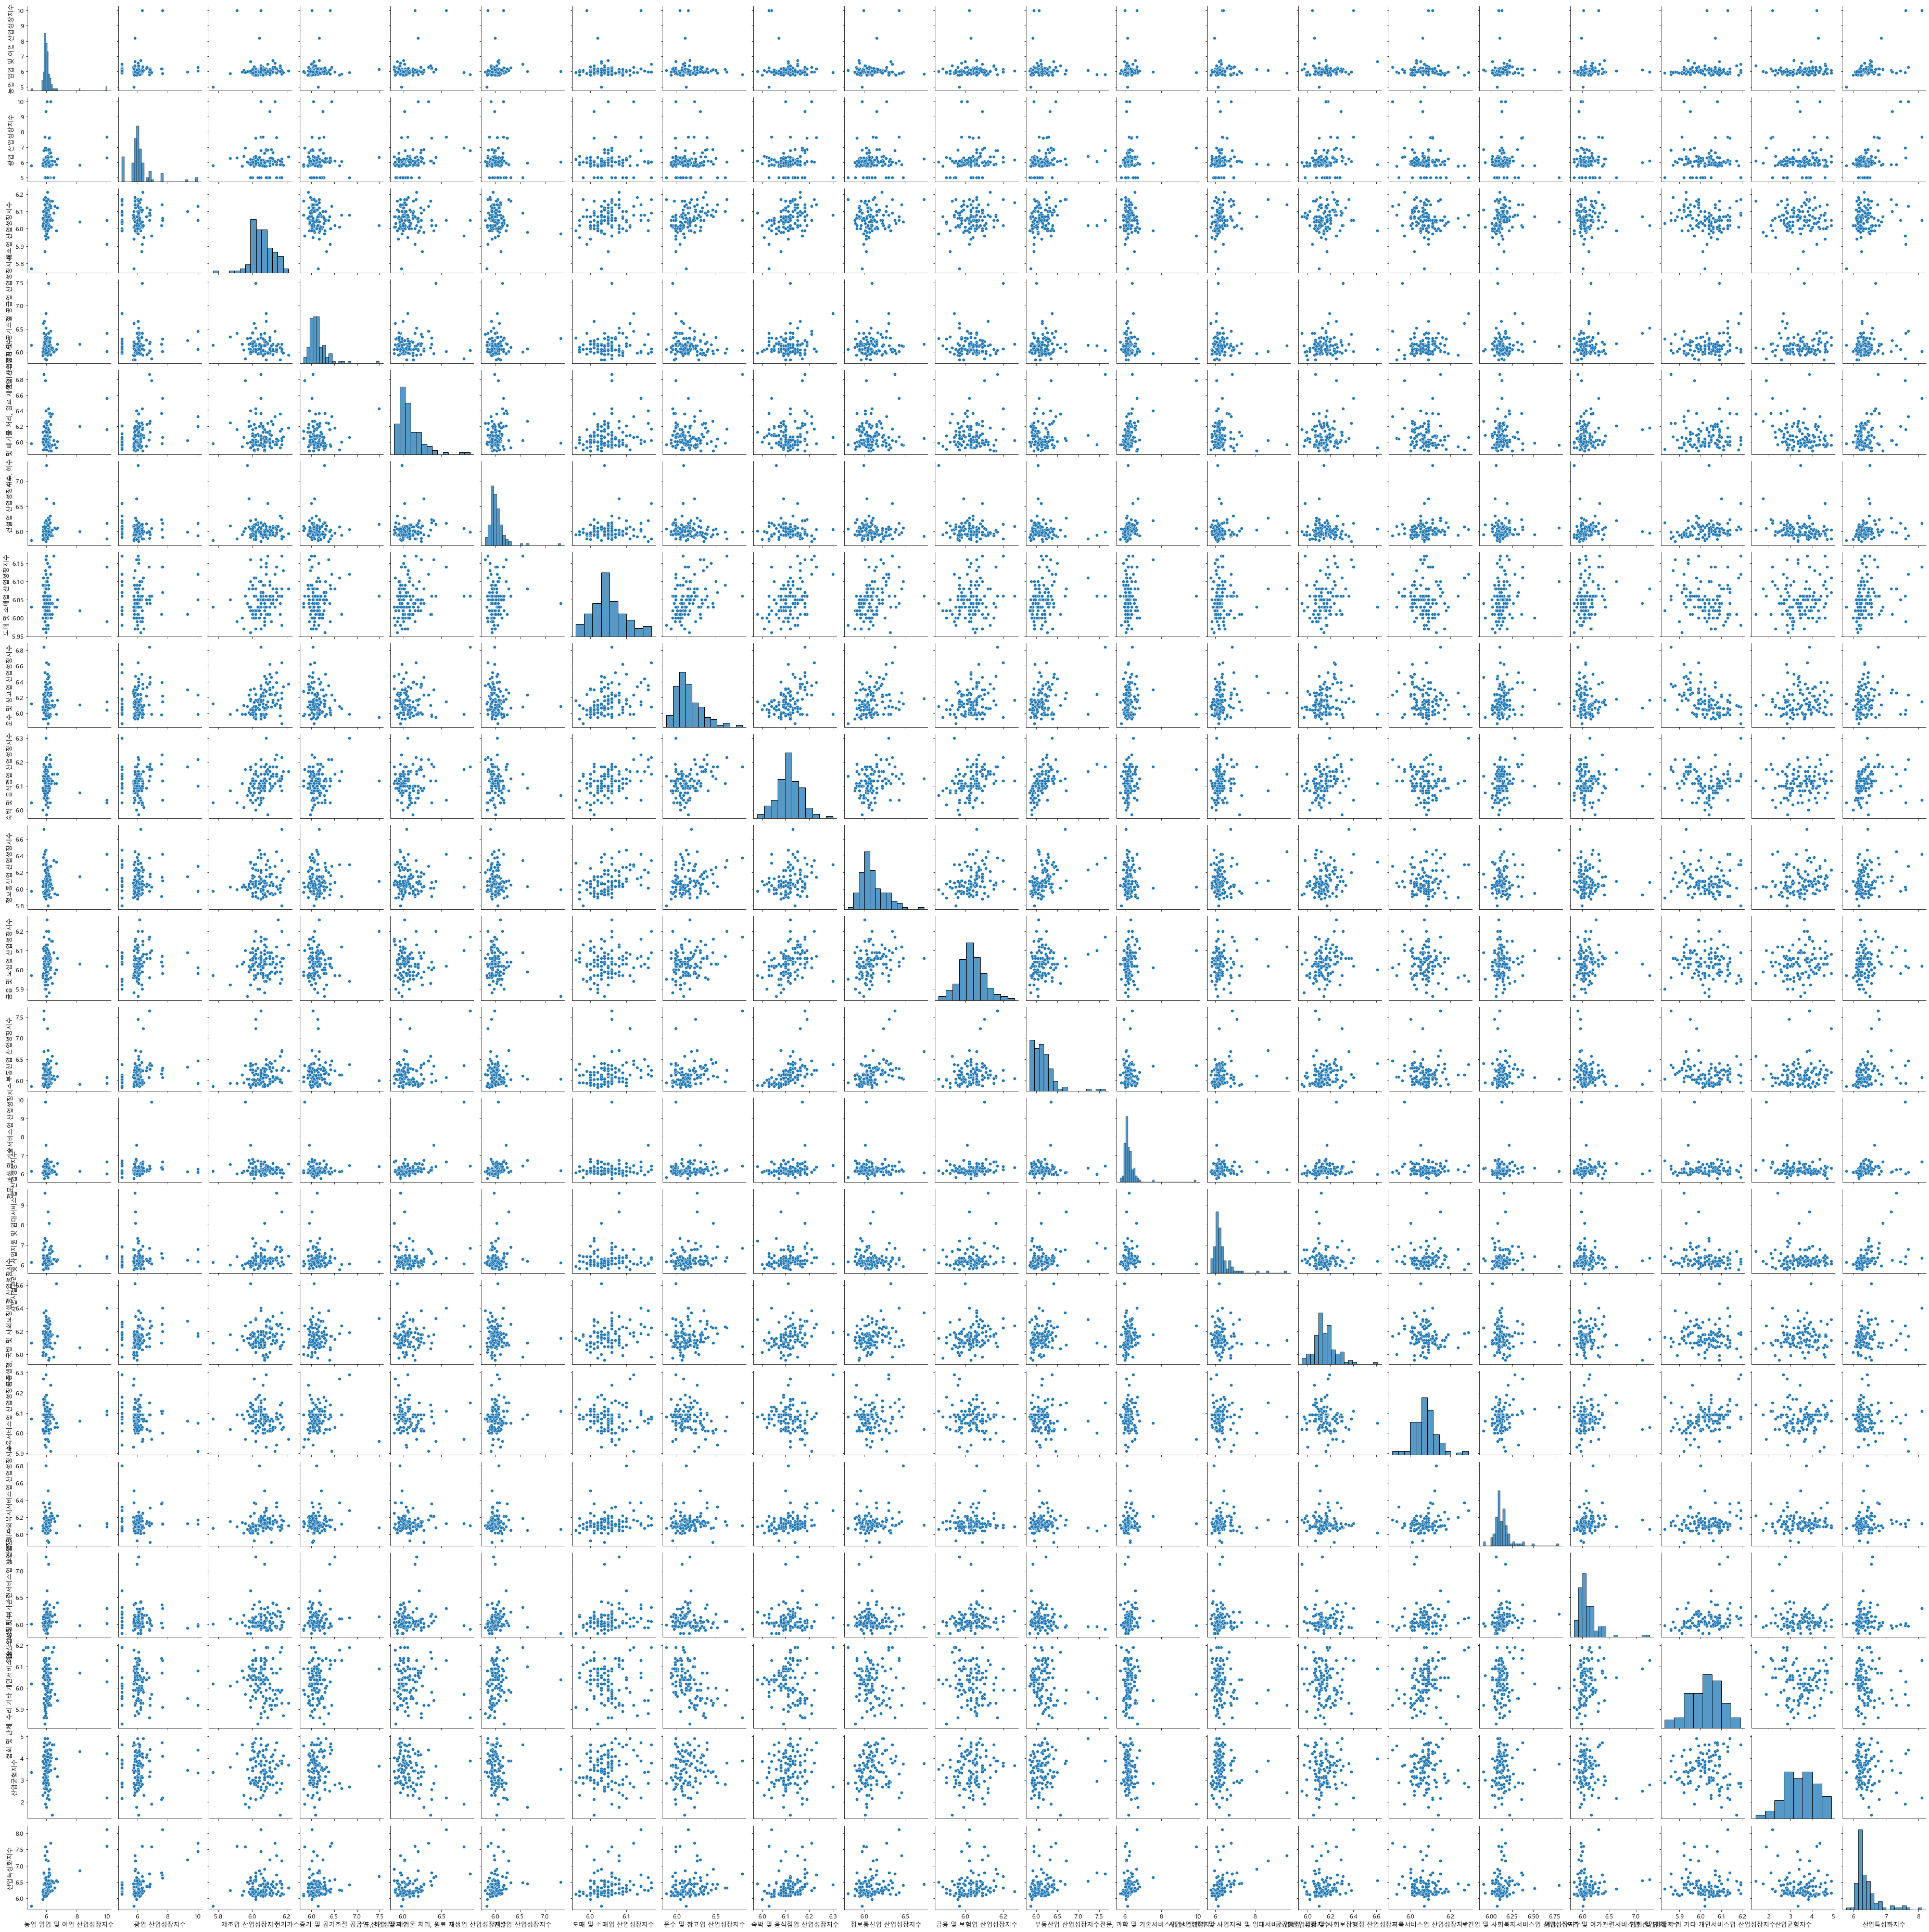

In [6]:
# 산업 특성화지수 시각화
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.size']=12
#-------------------------------한글 폰트 깨짐 방지-------------------------------#
sns.pairplot(df[['농업 임업 및 어업 산업성장지수', '광업 산업성장지수', '제조업 산업성장지수',
       '전기가스증기 및 공기조절 공급업 산업성장지수', '수도, 하수 및 폐기물 처리, 원료 재생업 산업성장지수',
       '건설업 산업성장지수', '도매 및 소매업 산업성장지수', '운수 및 창고업 산업성장지수', '숙박 및 음식점업 산업성장지수',
       '정보통신업 산업성장지수', '금융 및 보험업 산업성장지수', '부동산업 산업성장지수',
       '전문, 과학 및 기술서비스업 산업성장지수', '사업시설관리 및 사업지원 및 임대서비스업 산업성장지수',
       '공공행정, 국방 및 사회보장행정 산업성장지수', '교육서비스업 산업성장지수', '보건업 및 사회복지서비스업 산업성장지수',
       '예술, 스포츠 및 여가관련서비스업 산업성장지수', '협회 및 단체, 수리 기타 개인서비스업 산업성장지수', '산업균형지수',
       '산업특성화지수']])
plt.show()

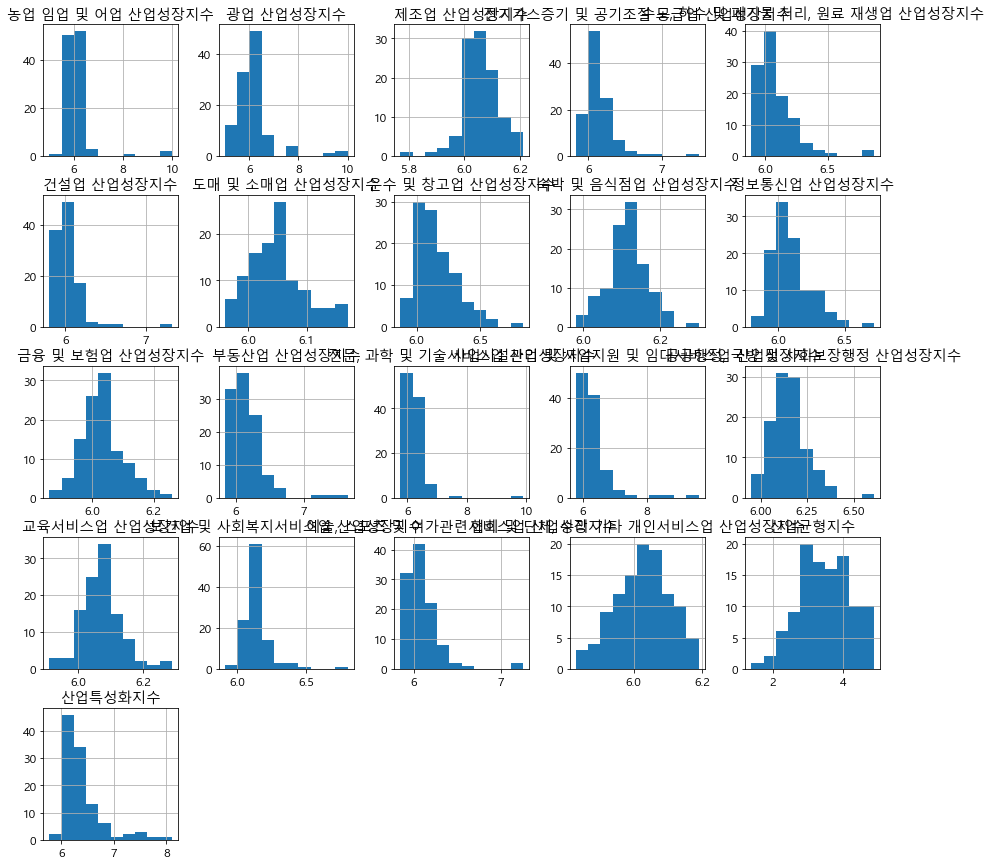

In [7]:
df.hist(figsize=(15,15))
plt.show()

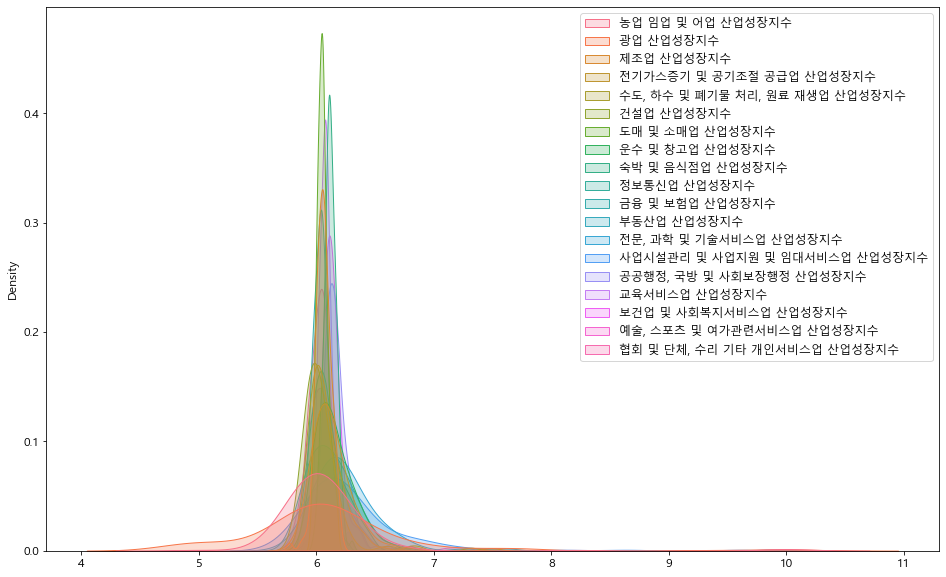

In [8]:
fig, ax = plt. subplots(figsize = (16,10))     # subplots: 한번에 여러 그래프를 보여주기 위해 사용
sns.kdeplot(data = df[['농업 임업 및 어업 산업성장지수', '광업 산업성장지수', '제조업 산업성장지수',
       '전기가스증기 및 공기조절 공급업 산업성장지수', '수도, 하수 및 폐기물 처리, 원료 재생업 산업성장지수',
       '건설업 산업성장지수', '도매 및 소매업 산업성장지수', '운수 및 창고업 산업성장지수', '숙박 및 음식점업 산업성장지수',
       '정보통신업 산업성장지수', '금융 및 보험업 산업성장지수', '부동산업 산업성장지수',
       '전문, 과학 및 기술서비스업 산업성장지수', '사업시설관리 및 사업지원 및 임대서비스업 산업성장지수',
       '공공행정, 국방 및 사회보장행정 산업성장지수', '교육서비스업 산업성장지수', '보건업 및 사회복지서비스업 산업성장지수',
       '예술, 스포츠 및 여가관련서비스업 산업성장지수', '협회 및 단체, 수리 기타 개인서비스업 산업성장지수']], shade = True)        
plt.show()  

<ipython-input-9-2daccae293a2>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype = np.bool)


<AxesSubplot:>

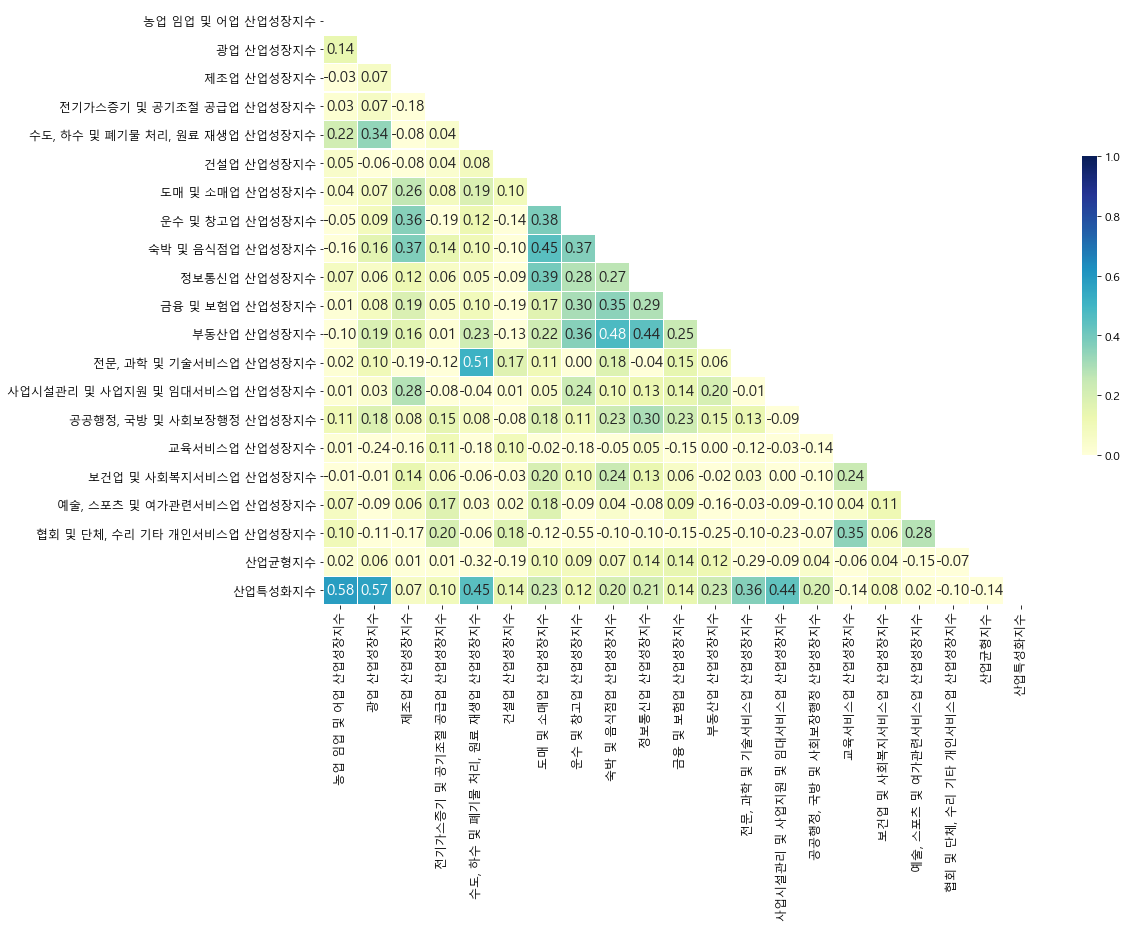

In [9]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize = (16,11))

mask = np.zeros_like(df_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr,                        #데이터
            vmin = 0,                      #최댓값
            vmax = 1,                      #최솟값
            cbar = True,                  #colorbar 유무
            cbar_kws={"shrink": .5},      #colorbar 크기
            linewidths = 0.1,             #cell 사이의 선  
            annot=True,                  #각 cell 값의 데이터 표기 유무
            annot_kws={"size": 15},
            fmt=".2f",                    #데이터 표기 
            cmap='YlGnBu',               #히트맵의 색
            mask = mask)

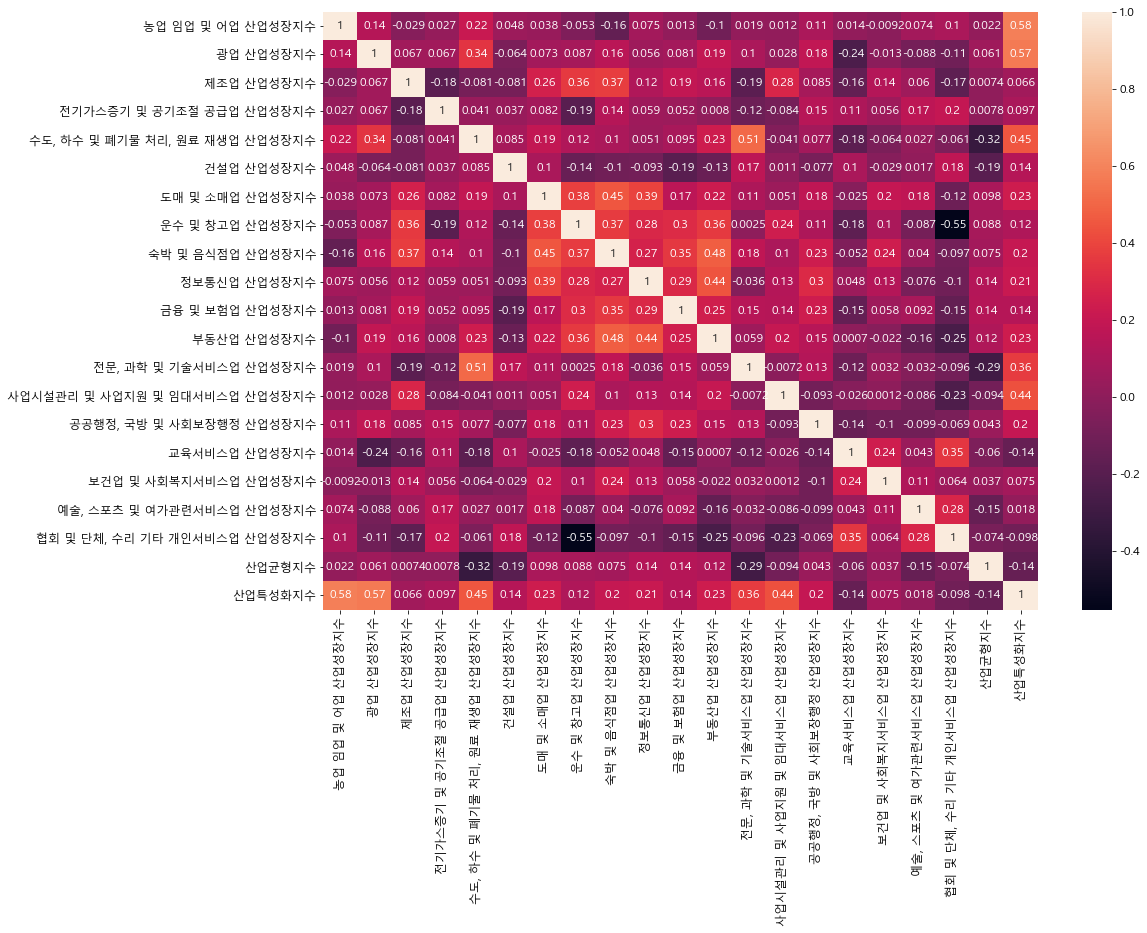

In [10]:
fig, ax = plt.subplots(figsize = (16,11))
sns.heatmap(df_corr, annot=True)
plt.show()

In [11]:
# 데이터셋 생성
x=df[['농업 임업 및 어업 산업성장지수', '광업 산업성장지수', '제조업 산업성장지수',
       '전기가스증기 및 공기조절 공급업 산업성장지수', '수도, 하수 및 폐기물 처리, 원료 재생업 산업성장지수',
       '건설업 산업성장지수', '도매 및 소매업 산업성장지수', '운수 및 창고업 산업성장지수', '숙박 및 음식점업 산업성장지수',
       '정보통신업 산업성장지수', '금융 및 보험업 산업성장지수', '부동산업 산업성장지수',
       '전문, 과학 및 기술서비스업 산업성장지수', '사업시설관리 및 사업지원 및 임대서비스업 산업성장지수',
       '공공행정, 국방 및 사회보장행정 산업성장지수', '교육서비스업 산업성장지수', '보건업 및 사회복지서비스업 산업성장지수',
       '예술, 스포츠 및 여가관련서비스업 산업성장지수', '협회 및 단체, 수리 기타 개인서비스업 산업성장지수','산업균형지수']]
y=df['산업특성화지수'] # 산업특성화지수

In [12]:
# 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [13]:
# 모델 학습
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
# 학습 평가
from sklearn.metrics import classification_report
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
# trainset, testset에 대해 model의 정확도를 판단
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9374831545535769
0.24171602996346286


In [16]:
# classification_report >> 정수형으로 바꿔야만 성립 가능
y_test=y_test.astype('int')
y_test_pred=np.asarray(y_test_pred, dtype = int)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           6       0.97      0.94      0.95        32
           7       0.00      0.00      0.00         1

    accuracy                           0.91        33
   macro avg       0.32      0.31      0.32        33
weighted avg       0.94      0.91      0.92        33



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classif